In [2]:
import numpy as np

## $y=|x+1| + 1$, finding its minimal values

In [3]:
f = lambda x: abs(np.array(x)+1) + 1
f1 = lambda x: 2 * np.pi * x**2 + 2 / x

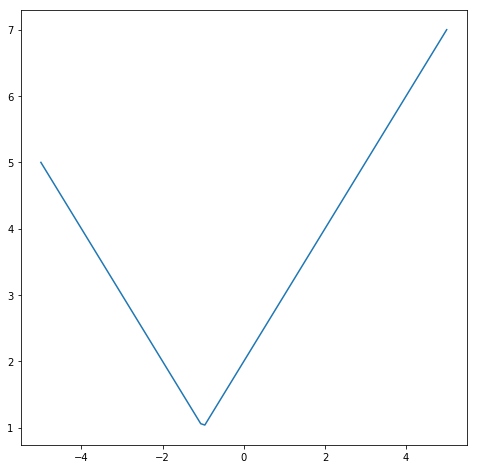

In [4]:
import matplotlib.pyplot as plt

xn = np.linspace(-5, 5, 100)
plt.figure(figsize=(8, 8))
plt.plot(xn, f(xn))
plt.show()

## Golden Section Search

### From Scratch

In [5]:
def golden_section_search(f, a, b, epsilon=1e-10):
    tau = 0.5 * (np.sqrt(5) - 1) # golden ration
    x0 = a + (1 - tau) * (b - a)
    x1 = a + tau * (b - a)
    f0 = f(x0)
    f1 = f(x1)
    c = []
    for k in range(99):
        c.append(0.5 * (a + b))
        if abs(b - a) < epsilon:
            print("The number of iterations: {}".format(k+1))
            break
        elif f0 >= f1:
            a = x0
            x0 = x1
            f0 = f1
            x1 = a + tau * (b - a)
            f1 = f(x1)
        else:
            b = x1
            x1 = x0
            f1 = f(x0)
            x0 = a + (1 - tau) * (b - a)
            f0 = f(x0)
            
    return c[-1], c

In [6]:
x_min, iter_pts = golden_section_search(f, -5, 5)
x_min

The number of iterations: 54


-0.9999999999836918

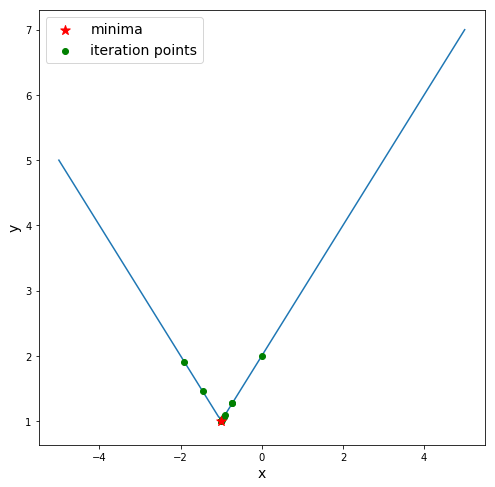

In [7]:
plt.figure(figsize=(8, 8))
plt.plot(xn, f(xn))
plt.scatter(x_min, f(x_min), c='red', marker="*", s=100, 
            zorder=10, label="minima")
plt.scatter(iter_pts, f(iter_pts), c='g', zorder=5, label="iteration points")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)
plt.show()

### Using `Scipy`

In [8]:
from scipy import optimize

optimize.minimize_scalar(f, bracket=(-5, 5), method='Golden')

     fun: 1.0000000025769449
    nfev: 48
     nit: 43
 success: True
       x: -0.9999999974230552

In [9]:
#optimize.minimize_scalar(f1, bracket=(1, 10), method='Golden')